In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta, date
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

stock_name_list = []
while len(stock_name_list) < 6:
    stockname = input("Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5").upper()
    if stockname == 'Q':
        break
    else:
        stock_name_list.append(stockname)
        continue

syear = int(input("Enter the year started"))
smonth = int(input("Enter the month 1-12"))
sday = int(input("Enter the day 1-31"))

sdate = datetime(syear, smonth, sday)
add = timedelta(days = 1)
edate = sdate + add
current_date = datetime.now()

def change_time(sdate, edate, add):
    sdate += add
    edate += add
    return sdate, edate

stocklist = []
for stockname in stock_name_list:
    stock = yf.download(stockname, start=sdate, end=current_date, interval="1d", progress=False)
        
    stock['Average Price'] = (stock['High'] + stock['Low']) / 2
    stock["Percent Change"] = (stock["Average Price"].pct_change() * 100)
    stock.drop(["Close", "Open", "Volume"], axis = 1, inplace = True)

    stocklist.append(stock)

for stock in stocklist:
    display(stock)


Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 qqq
Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 aapl
Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 dis
Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 soxx
Enter the etf or stock code ex. QQQ, MSFT, etc. of choice, enter q when done, max size of 5 q
Enter the year started 2025
Enter the month 1-12 5
Enter the day 1-31 15


Price,High,Low,Average Price,Percent Change
Ticker,QQQ,QQQ,,
Date,,,,
2025-05-15,520.070776,513.334846,516.702811,NaN
2025-05-16,519.841608,515.257958,517.549783,0.163919
2025-05-19,520.668619,512.408111,516.538365,-0.195424
2025-05-20,519.074309,514.819501,516.946905,0.079092
2025-05-21,521.136944,509.418827,515.277885,-0.322861
...,...,...,...,...
2026-01-09,627.890015,619.059998,623.475006,0.461646
2026-01-12,628.849976,622.260010,625.554993,0.333612


Price,High,Low,Average Price,Percent Change
Ticker,AAPL,AAPL,,
Date,,,,
2025-05-15,212.512590,209.099762,210.806176,NaN
2025-05-16,212.123407,209.329287,210.726347,-0.037868
2025-05-19,209.039881,203.830847,206.435364,-2.036282
2025-05-20,208.032018,204.599243,206.315630,-0.058000
2025-05-21,206.605018,200.288330,203.446674,-1.390567
...,...,...,...,...
2026-01-09,260.209991,256.220001,258.214996,0.279615
2026-01-12,261.299988,256.799988,259.049988,0.323371


Price,High,Low,Average Price,Percent Change
Ticker,DIS,DIS,,
Date,,,,
2025-05-15,111.615622,110.359517,110.987569,NaN
2025-05-16,112.199175,110.201266,111.200221,0.191600
2025-05-19,111.754089,110.676015,111.215052,0.013337
2025-05-20,112.159614,110.587002,111.373308,0.142298
2025-05-21,111.259557,108.925370,110.092463,-1.150046
...,...,...,...,...
2026-01-09,115.980003,113.900002,114.940002,1.028392
2026-01-12,114.940002,112.550003,113.745003,-1.039673


Price,High,Low,Average Price,Percent Change
Ticker,SOXX,SOXX,,
Date,,,,
2025-05-15,213.766620,209.700087,211.733354,NaN
2025-05-16,212.334890,209.471406,210.903148,-0.392100
2025-05-19,211.171600,206.975807,209.073704,-0.867433
2025-05-20,210.406005,208.208691,209.307348,0.111752
2025-05-21,212.672925,205.166248,208.919587,-0.185259
...,...,...,...,...
2026-01-09,330.670013,321.109985,325.889999,1.746828
2026-01-12,331.380005,325.529999,328.455002,0.787076


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 5
Enter the day 1-31 16
Enter money put in ex. 50 400


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 6
Enter the day 1-31 10
Enter money put in ex. 50 500


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 7
Enter the day 1-31 23
Enter money put in ex. 50 2000


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 8
Enter the day 1-31 7
Enter money put in ex. 50 20


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 10
Enter the day 1-31 16
Enter money put in ex. 50 800


Enter the date and money inputed, enter q for year when done


Enter the year 2025
Enter the month 1-12 11
Enter the day 1-31 5
Enter money put in ex. 50 5000


Enter the date and money inputed, enter q for year when done


Enter the year q


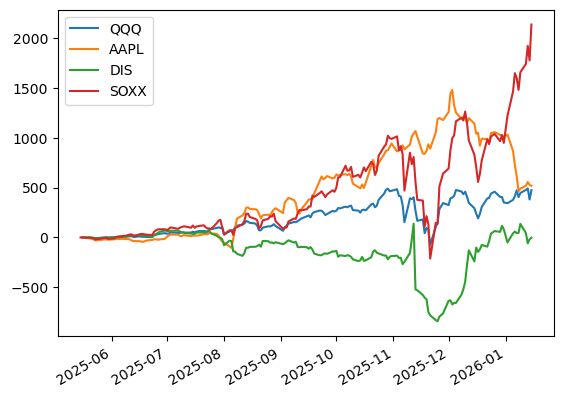

In [2]:
user_standings = pd.DataFrame(index = stocklist[0].index)
user_standings["Money In"] = 0.0

amount = 0
stock["Money In"] = 0.0
stock["Shares Owned"] = 0.0
total_shares_list = [0.0] * len(stocklist)


while True:
    print("Enter the date and money inputed, enter q for year when done")
    year = input("Enter the year")
    
    if year == "q":
        break
    else:
        year = int(year)
    month = int(input("Enter the month 1-12"))
    day = int(input("Enter the day 1-31"))
    added = int(input("Enter money put in ex. 50"))
    amount += added
    
    for i, stock in enumerate(stocklist):
        
        price = stock.loc[datetime(year, month, day), "Average Price"]
        bought = added / price
        total_shares_list[i] += bought
    
        mask = stock.index >= datetime(year, month, day)
        stock.loc[mask, "Shares Owned"] = float(total_shares_list[i])
        stock.loc[mask, "Money In"] = amount


for stock in stocklist:
    stock["Equity"] = (stock["Shares Owned"] * stock["Average Price"])
    stock["Total Return"] = round((stock["Equity"] - stock["Money In"]), 2)
    plt.plot(stock["Total Return"])

plt.legend(stock_name_list)
plt.gcf().autofmt_xdate()
plt.show()



In [3]:
final_return = 0
for stock in stocklist:
    final_return += stock["Total Return"].iloc[-1]
print("Your final return amount is: $", final_return.round(2))

Your final return amount is: $ 3125.06
